<a href="https://colab.research.google.com/github/siluni21/type-ai-in-healthcare-portpolio/blob/main/Week1_Vitals_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/DeegayuA/Teaching-data/main/patient_vitals.csv"
df = pd.read_csv(url)

In [4]:
# Display the first 5 rows of the DataFram

print("--- First 5 Rows of Data ---")
print((df.head()))

--- First 5 Rows of Data ---
  PatientID  Age  Gender  HeartRate  SystolicBP  DiastolicBP
0    PID001   63    Male         78         145           91
1    PID002   37  Female         72         120           80
2    PID003   41  Female         85         130           85
3    PID004   56    Male         90         148           94
4    PID005   72  Female         68         155           92


In [5]:
# Get the summery of columns, data types, and any missing values

print("\n--- Data Information Summery ---")
df.info()


--- Data Information Summery ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PatientID    100 non-null    object
 1   Age          100 non-null    int64 
 2   Gender       100 non-null    object
 3   HeartRate    100 non-null    int64 
 4   SystolicBP   100 non-null    int64 
 5   DiastolicBP  100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


1. What is the average age of the patients in this dataset?

In [8]:
# calculate the mean of the 'Age' colunm
avarage_age = df['Age'].mean()

print(f"Report Insight 1: The average patient age is {avarage_age:.2f} years.")


Report Insight 1: The average patient age is 49.21 years.


2. What are the highest and lowest rates recorded?

In [10]:
# Calculate the max amd min of the 'Heatrate' column

max_heart_rate = df['HeartRate'].max()
min_heart_rate = df['HeartRate'].min()

print(f"Report Insight 1: Heart rates range from {min_heart_rate} bpm to {max_heart_rate} bpm.")

Report Insight 1: Heart rates range from 68 bpm to 92 bpm.


3.How many patients are showing signs of hypertension(lets define this as systolic blood pressur >140)

In [11]:
# create a new DataFrame containing only the row where systolicBP >140

hypertension_patients = df[df['SystolicBP'] > 140]

# Get the number of raw in this new DataFrome
num_hypertensive = len(hypertension_patients)

print(f"Report Insight 3: {num_hypertensive} patients show signs of hypertension systolic BP > 140")

Report Insight 3: 38 patients show signs of hypertension systolic BP > 140


4. Identify a specific high-risk group:female patient over 60.

In [12]:
# Filter for row where BOTH conditions are true:
#1.  'Gender' column is 'Female'
#2.  'Age' column is greater than 60
high_risk_female = df[(df['Gender'] == 'Female') & (df['Age'] > 60)]

print("\n--- High Risk Group Report (Females over 60) ---")
print(high_risk_female)


--- High Risk Group Report (Females over 60) ---
   PatientID  Age  Gender  HeartRate  SystolicBP  DiastolicBP
4     PID005   72  Female         68         155           92
13    PID014   61  Female         74         142           90
17    PID018   67  Female         71         152           93
25    PID026   64  Female         72         147           92
29    PID030   69  Female         70         154           93
35    PID036   62  Female         73         145           91
39    PID040   66  Female         72         151           92
49    PID050   70  Female         71         156           94
55    PID056   63  Female         74         146           92
59    PID060   68  Female         70         153           93
65    PID066   61  Female         73         144           91
69    PID070   67  Female         71         152           93
77    PID078   64  Female         72         147           92
81    PID082   69  Female         69         154           93
87    PID088   62  F

**Visualizing the Data**

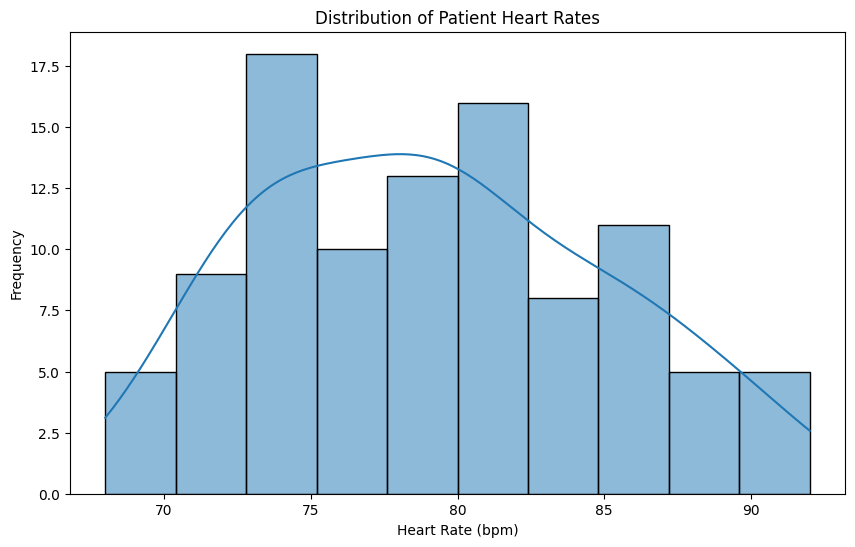

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='HeartRate' , ax=ax, bins=10, kde=True)
plt.title("Distribution of Patient Heart Rates")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.show()

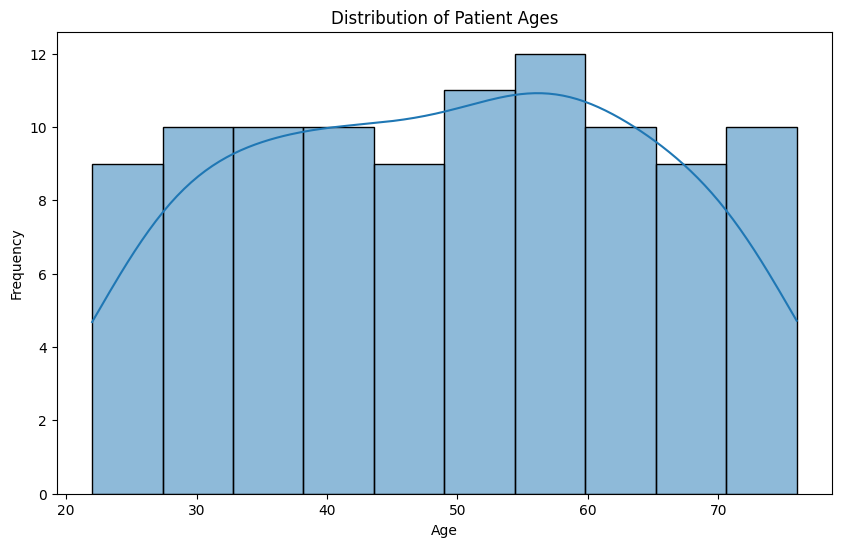

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

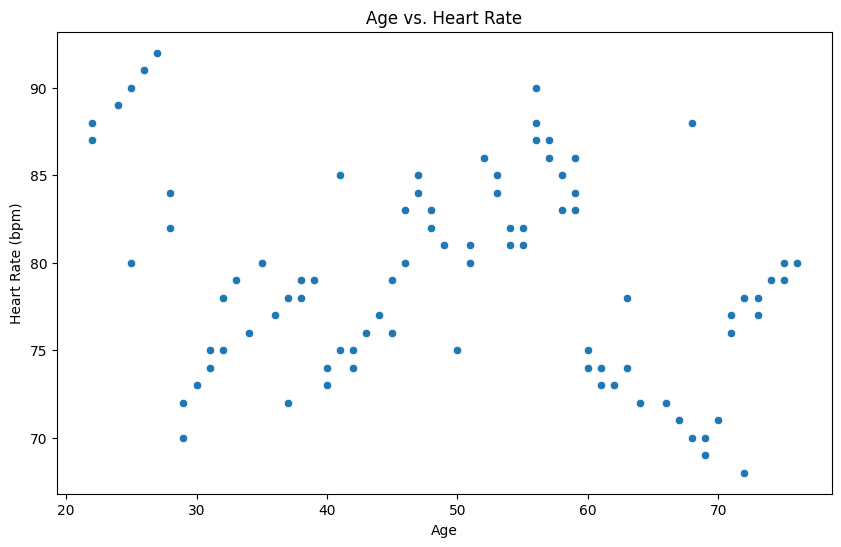

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='HeartRate')
plt.title("Age vs. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate (bpm)")
plt.show

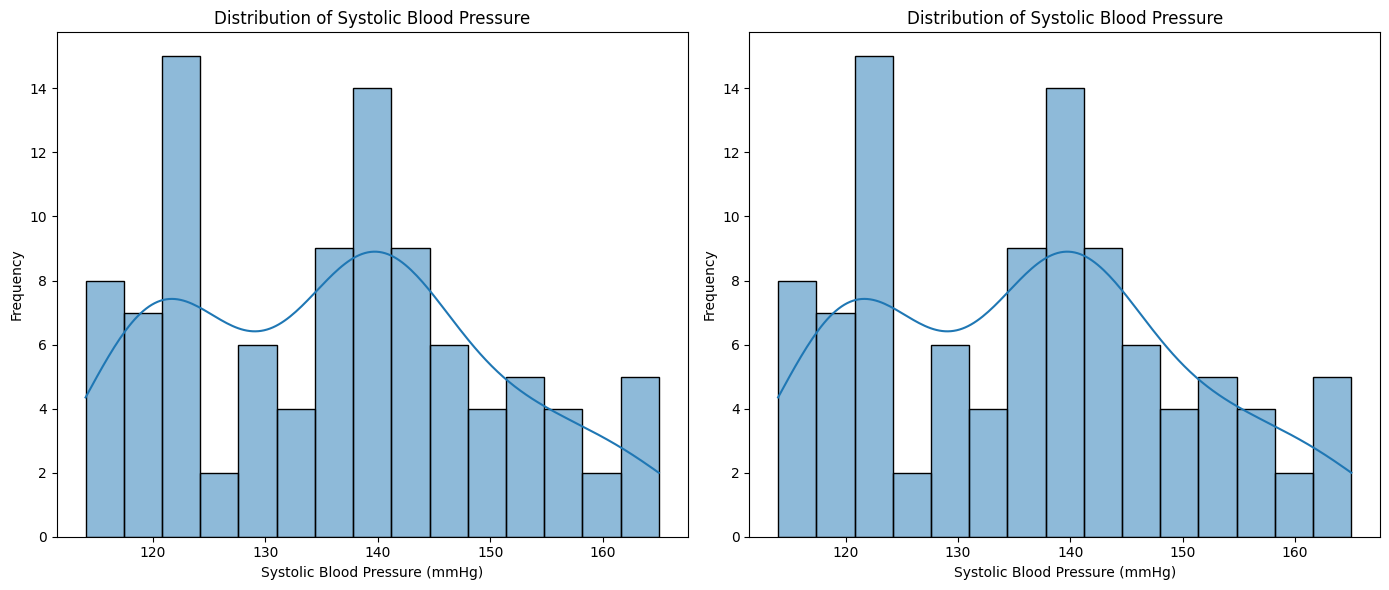

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='SystolicBP', ax=axes[0], bins=15, kde=True)
axes[0].set_title("Distribution of Systolic Blood Pressure")
axes[0].set_xlabel("Systolic Blood Pressure (mmHg)")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df, x='SystolicBP', ax=axes[1], bins=15, kde=True)
axes[1].set_title("Distribution of Systolic Blood Pressure")
axes[1].set_xlabel("Systolic Blood Pressure (mmHg)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

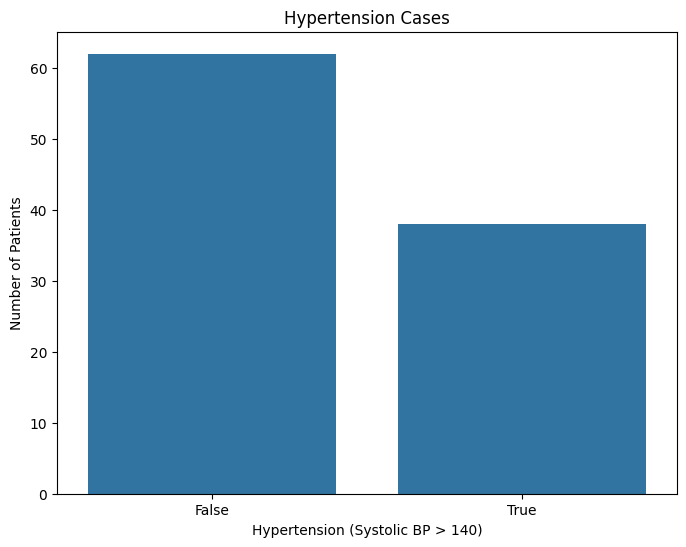

In [23]:
# Create a new 'Hypertension' column based on SystolicBP > 140
df['Hypertension'] = df['SystolicBP'] > 140

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hypertension')
plt.title("Hypertension Cases")
plt.xlabel("Hypertension (Systolic BP > 140)")
plt.ylabel("Number of Patients")
plt.show()

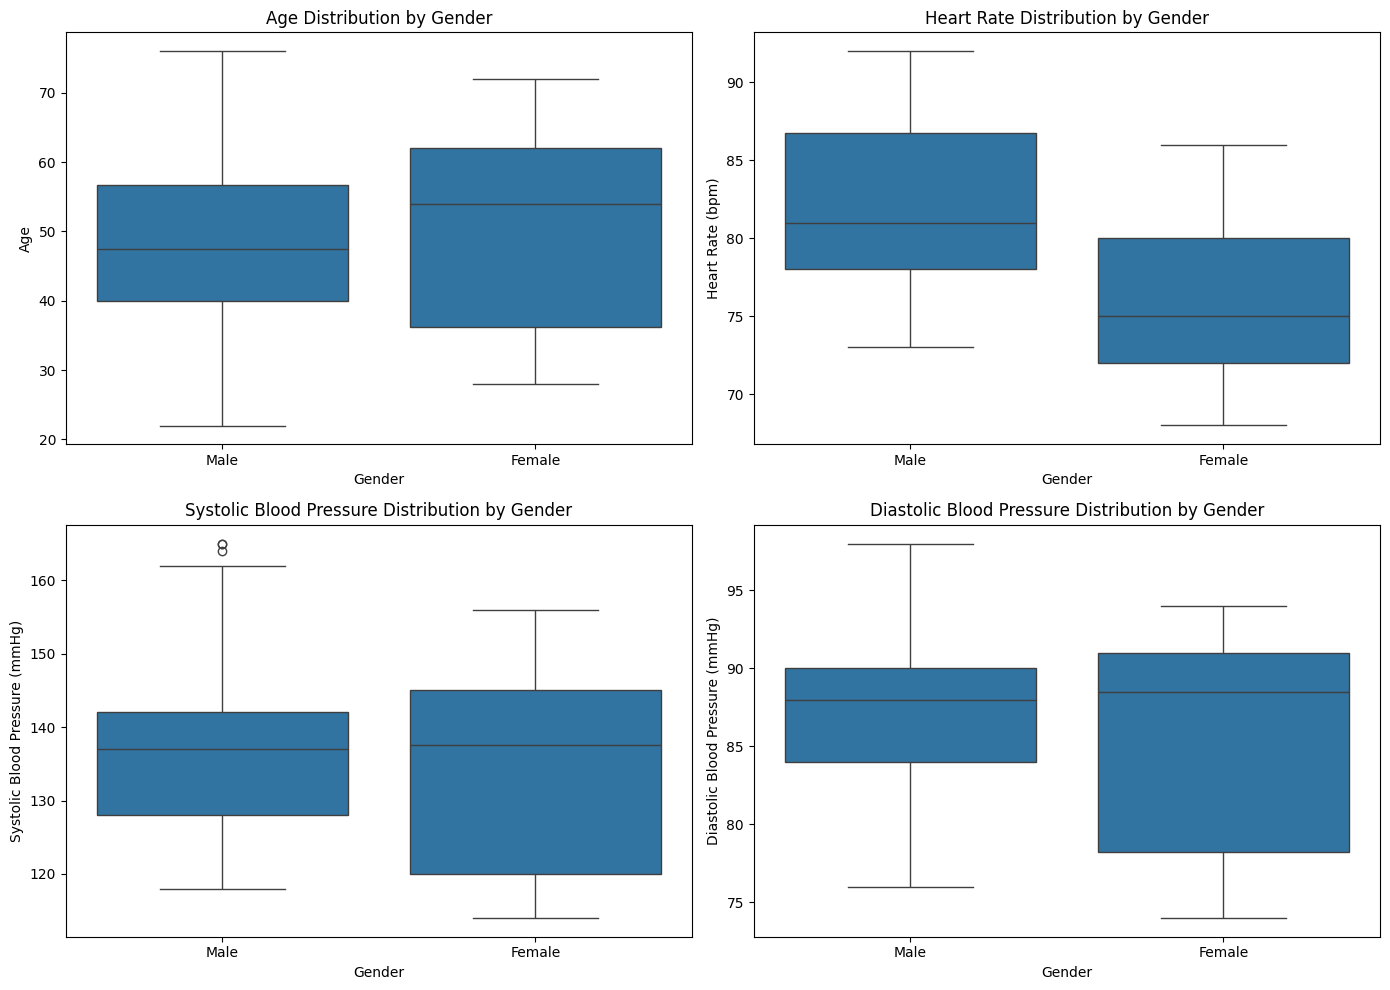

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df, x='Gender', y='Age', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution by Gender")
axes[0, 0].set_ylabel("Age")

sns.boxplot(data=df, x='Gender', y='HeartRate', ax=axes[0, 1])
axes[0, 1].set_title("Heart Rate Distribution by Gender")
axes[0, 1].set_ylabel("Heart Rate (bpm)")

sns.boxplot(data=df, x='Gender', y='SystolicBP', ax=axes[1, 0])
axes[1, 0].set_title("Systolic Blood Pressure Distribution by Gender")
axes[1, 0].set_ylabel("Systolic Blood Pressure (mmHg)")

sns.boxplot(data=df, x='Gender', y='DiastolicBP', ax=axes[1, 1])
axes[1, 1].set_title("Diastolic Blood Pressure Distribution by Gender")
axes[1, 1].set_ylabel("Diastolic Blood Pressure (mmHg)")

plt.tight_layout()
plt.show()

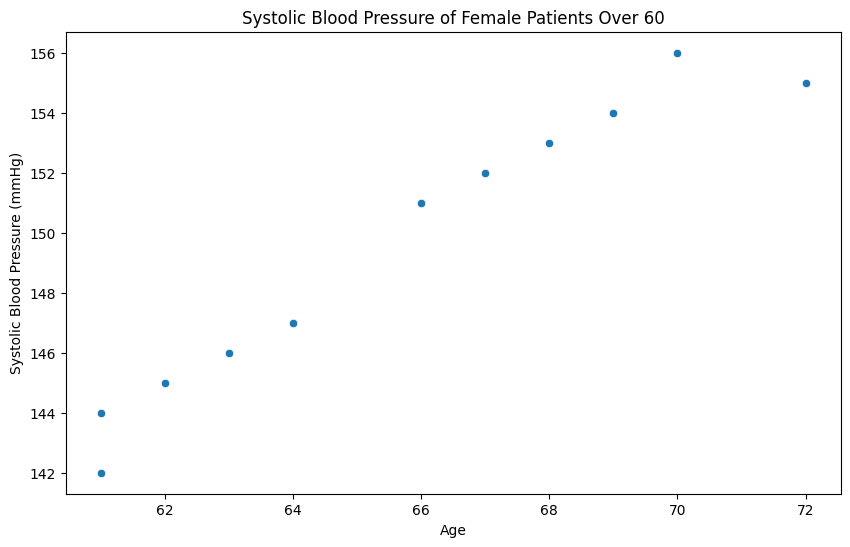

In [22]:
high_risk_females = df[(df['Gender'] == 'Female') & (df['Age'] > 60)].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_risk_females, x='Age', y='SystolicBP')
plt.title("Systolic Blood Pressure of Female Patients Over 60")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.show()